In [59]:
import argparse
import pickle
import os
import h5py
import matplotlib
from timeit import default_timer as timer
import pandas as pd
import TMQGP as tm
import QuarkTM
from QuarkTM import Channel, Particle

import tqdm
import numpy as np
from scipy import signal
from scipy.integrate import quad
from syntax_sugar import END, pipe
from syntax_sugar import process_syntax as p
from syntax_sugar import thread_syntax as t
NTHR = 18
from numpy import log, sqrt, exp, pi, real, imag, array
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('publication')
from os.path import join

In [60]:
import PyPDF2

In [61]:
folder = './mu1'

In [65]:
df = h5py.File(os.path.join(folder, 'data.hdf5'), 'r')

In [66]:
nplots = len(list(df.keys()))

In [67]:
list(df.keys())

['160', '200', '300', '400']

In [68]:
erange = df['160'].attrs['erange']
trange = array([0.16, 0.2, 0.3, 0.4])

In [69]:
list(df['160'].attrs.items())

[('G', 14.0),
 ('G1', 14.5),
 ('L', 0.2),
 ('P_Phi', array([0.00156751])),
 ('P_Phi_G', array([4.48502194e-06])),
 ('P_Phi_Q', array([0.00156303])),
 ('P_Q_G', array([2.41680075e-05])),
 ('P_Q_Q', array([0.00544253])),
 ('P_S_G', array([-2.52603241e-05])),
 ('P_S_Q', array([-0.0049876])),
 ('Ptot', array([0.00202135])),
 ('T', 0.16),
 ('erange',
  array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
         -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
         -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
         -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
         -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
          0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
          1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
          2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
          3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  

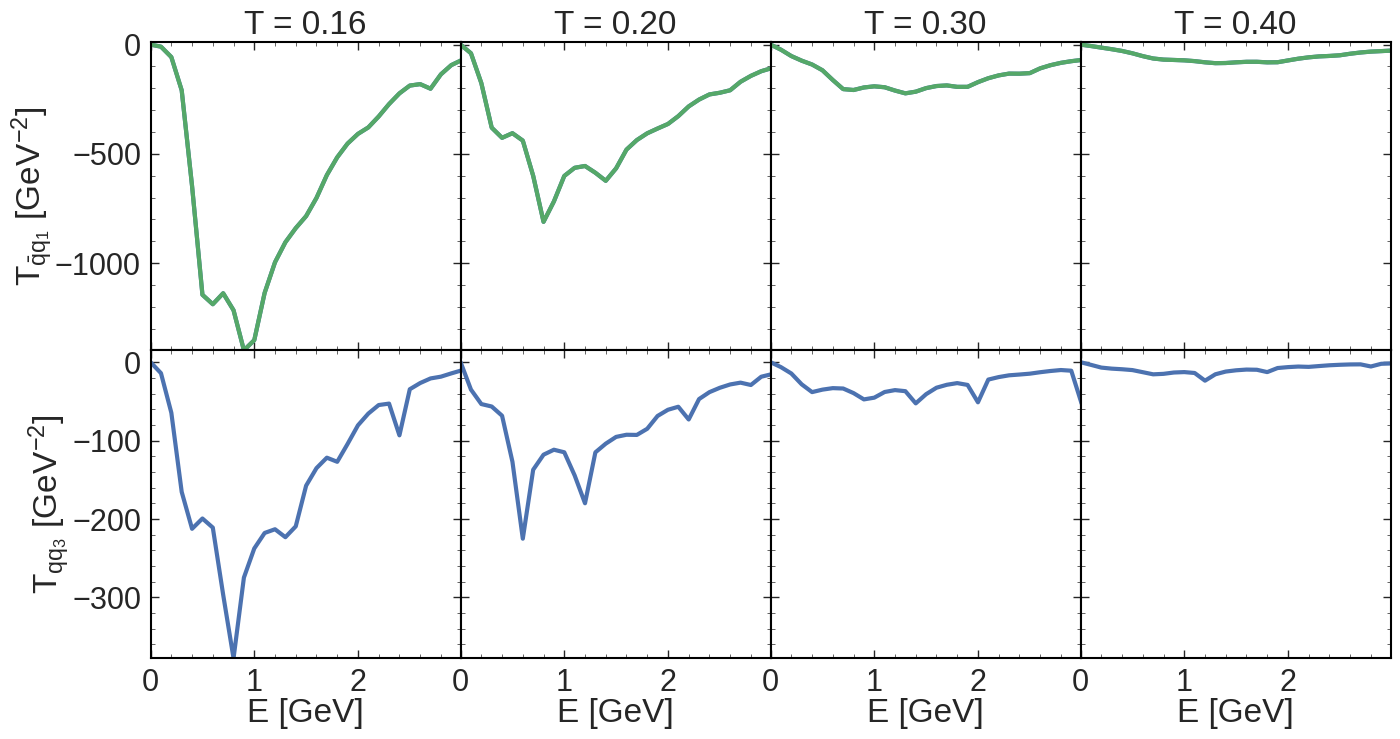

In [70]:
fig, ax = plt.subplots(2, nplots, figsize=(4*nplots, 8), sharey='row', sharex='all')

for i, key in enumerate(sorted(list(df.keys()))):
    ax[0][i].plot(erange, imag(df[key]['TM']['qa1']['0'][:, 0]))
    ax[0][i].plot(erange, imag(df[key]['TM']['aq1']['0'][:, 0]))
    ax[1][i].plot(erange, imag(df[key]['TM']['qq3']['0'][:, 0]))
    ax[0][i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(0, 2.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

ax[0][0].set_ylabel(r'$T_{\bar q q_1}$ [GeV$^{-2}$]')
ax[1][0].set_ylabel(r'$T_{q q_3}$ [GeV$^{-2}$]')

plt.subplots_adjust(hspace=0, wspace=0)

plt.savefig(os.path.join(folder, 'T_Q_l0.pdf'), bbox_inches='tight')

In [71]:
plt.close()

In [72]:
key = '160'

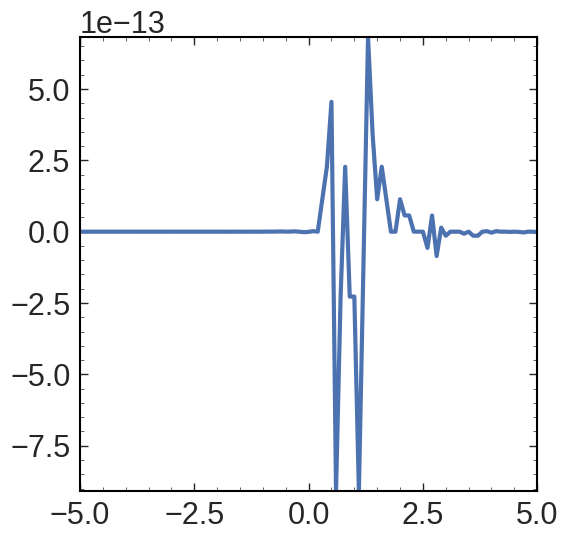

In [73]:
plt.plot(erange, imag(df[key]['TM']['qa1']['0'][:, 0]) - imag(df[key]['TM']['aq1']['0'][:, 0]))
# plt.show()

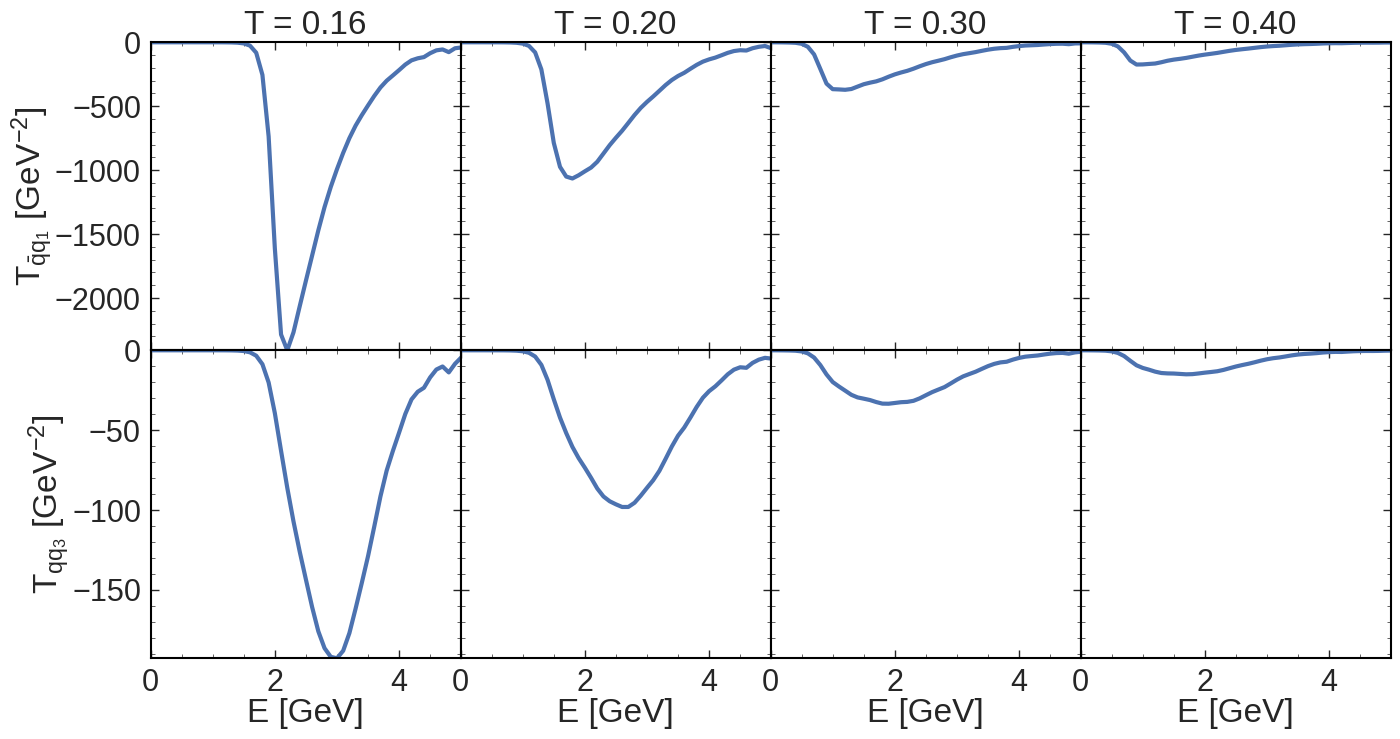

In [74]:
fig, ax = plt.subplots(2, nplots, figsize=(4*nplots, 8), sharey='row', sharex='all')

for i, key in enumerate(sorted(list(df.keys()))):
    ax[0][i].plot(erange, imag(df[key]['TM']['gg1']['0'][:, 0]))
    ax[1][i].plot(erange, imag(df[key]['TM']['gg27']['0'][:, 0]))
    ax[0][i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(0, 4.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

ax[0][0].set_ylabel(r'$T_{\bar q q_1}$ [GeV$^{-2}$]')
ax[1][0].set_ylabel(r'$T_{q q_3}$ [GeV$^{-2}$]')


plt.subplots_adjust(hspace=0, wspace=0)

plt.savefig(os.path.join(folder, 'T_G_l0.pdf'), bbox_inches='tight')

In [75]:
list(df['160']['Q'])

['G', 'R', 'S']

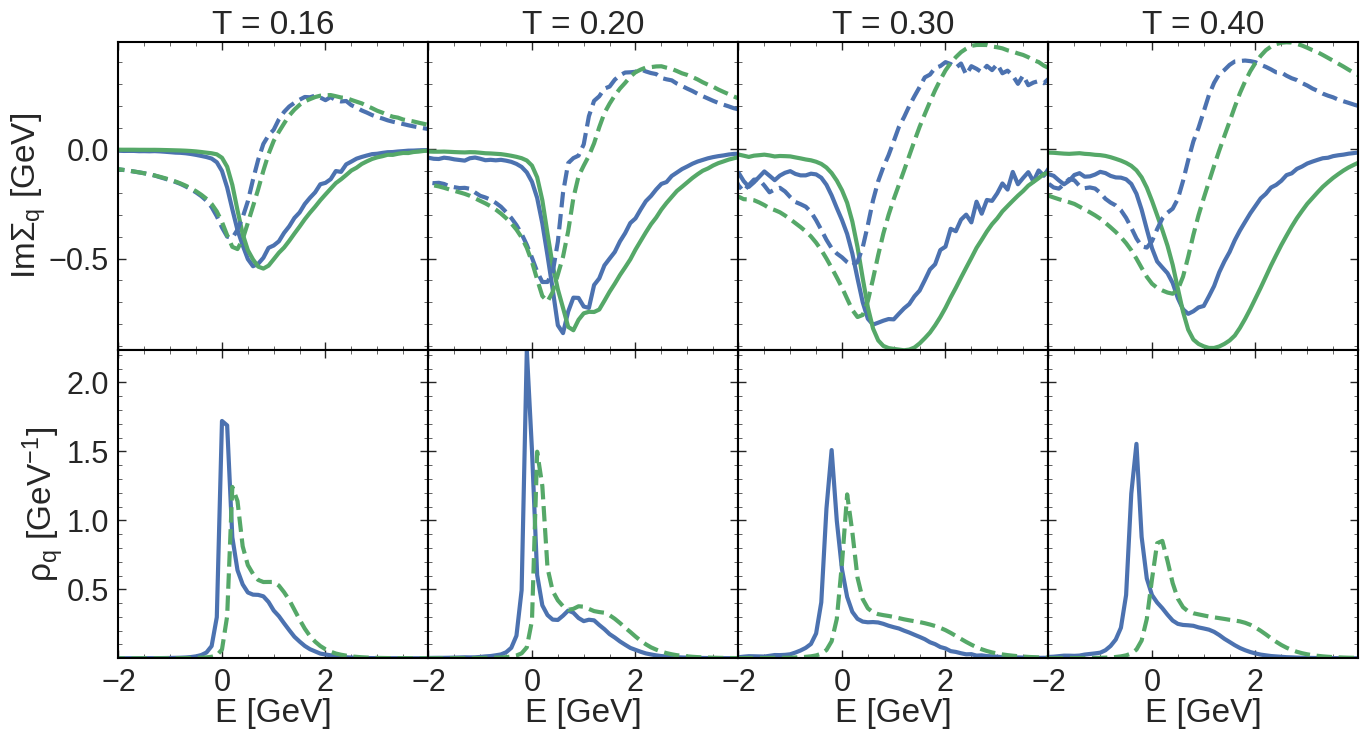

In [79]:
fig, ax = plt.subplots(2, nplots, figsize=(4*nplots, 8), sharey='row', sharex='all')

for i, key in enumerate(sorted(list(df.keys()))):
    lq, = ax[0][i].plot(erange, imag(df[key]['Q']['S'][:, 0]))
    la, = ax[0][i].plot(erange, imag(df[key]['A']['S'][:, 0]))
    ax[0][i].plot(erange, real(df[key]['Q']['S'][:, 0]), ls='--', c=lq.get_c())
    ax[0][i].plot(erange, real(df[key]['A']['S'][:, 0]), ls='--', c=la.get_c())
    
    ax[1][i].plot(erange, (df[key]['Q']['R'][:, 0]))

    ax[1][i].plot(erange, (df[key]['A']['R'][:, 0]), ls='--')
    ax[0][i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(-2, 3.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

ax[0][0].set_ylabel(r'Im$\Sigma_q$ [GeV]')
ax[1][0].set_ylabel(r'$\rho_q$ [GeV$^{-1}$]')

plt.subplots_adjust(hspace=0, wspace=0)

plt.savefig(os.path.join(folder, 'Rho_Q.pdf'), bbox_inches='tight')

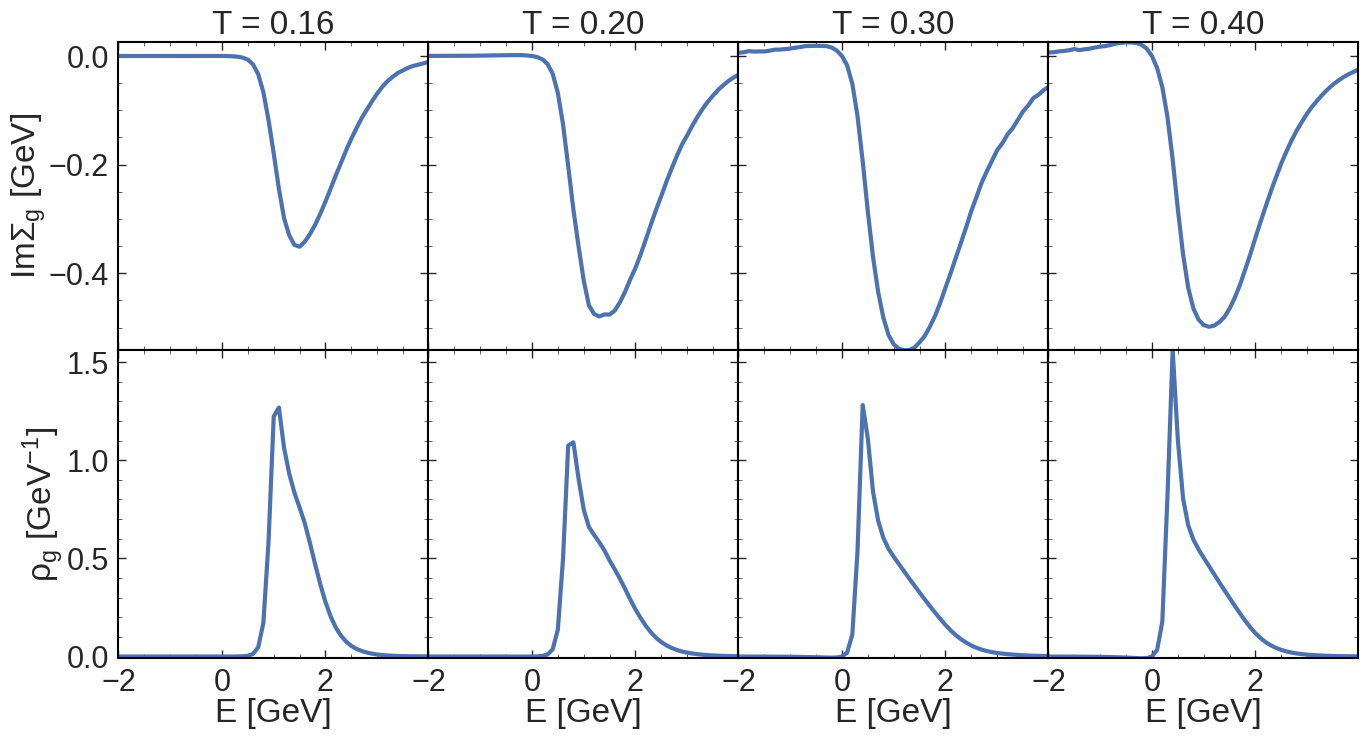

In [80]:
fig, ax = plt.subplots(2, nplots, figsize=(4*nplots, 8), sharey='row', sharex='all')

for i, key in enumerate(sorted(list(df.keys()))):
    ax[0][i].plot(erange, imag(df[key]['G']['S'][:, 0]))
    ax[1][i].plot(erange, (df[key]['G']['R'][:, 0]))
    ax[0][i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(-2, 3.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

ax[0][0].set_ylabel(r'Im$\Sigma_g$ [GeV]')
ax[1][0].set_ylabel(r'$\rho_g$ [GeV$^{-1}$]')

plt.subplots_adjust(hspace=0, wspace=0)

plt.savefig(os.path.join(folder, 'Rho_G.pdf'), bbox_inches='tight')

In [81]:
resonances = ['qa1', 'qq3', 'gg1']

mress = []

for r in resonances:
    mres = []
    for key in df.keys():
        tm = imag(df[key]['TM'][r]['0'][:, 0])
        # plt.plot(erange, tm)
        # print(erange[np.argmin(tm)])
        mres += [erange[np.argmin(tm)]]
    mress += [mres]
        
# plt.xlim(0, 2)

In [82]:
mress

[[0.9000000000000004,
  0.8000000000000007,
  1.3000000000000007,
  1.3000000000000007],
 [0.8000000000000007, 0.6000000000000005, 3.0, 1.2000000000000002],
 [2.2, 1.8000000000000007, 1.2000000000000002, 0.9000000000000004]]

In [83]:
d = dict(df.attrs)

del d['erange']
del d['qrange']

d

KeyError: 'erange'

In [91]:
fig = plt.figure()
fig.text(0, 0, str(d))
plt.savefig(join(folder, 'caption.pdf'), bbox_inches='tight')

<Figure size 590x590 with 0 Axes>

In [92]:
mQs = [d.attrs['mQ'] for k, d in df.items()]
mGs = [d.attrs['mG'] for k, d in df.items()]

In [88]:
df.attrs

<Attributes of HDF5 object at 139953300638272>

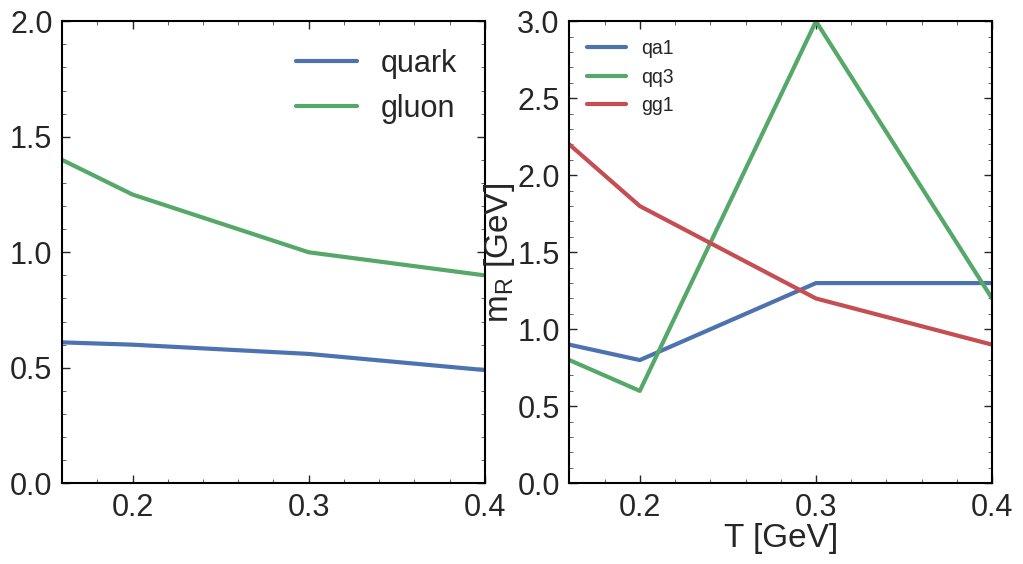

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].plot(trange, mQs, label='quark')
ax[0].plot(trange, mGs, label='gluon')
ax[0].legend()
for mres, r in zip(mress, resonances):
    ax[1].plot(trange, mres, label=r)

plt.legend(fontsize=14)
plt.ylim(0, 3)
ax[0].set_ylim(0, 2)
plt.xlabel('T [GeV]')
plt.ylabel(r'$m_R$ [GeV]')

plt.savefig(os.path.join(folder, 'mres.pdf'), bbox_inches='tight')

## Generate report

In [93]:
merger = PyPDF2.PdfWriter()

for f in ['caption.pdf', 'mres.pdf', 'Rho_Q.pdf', 'Rho_G.pdf', 'T_Q_l0.pdf', 'T_G_l0.pdf']:
    pdf = join(folder, f)
    merger.append(pdf)
merger.write(join(folder, 'report.pdf'))
merger.close()